# 数据可视化作业题目

In [1]:
#pip install seaborn

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.pyplot import MultipleLocator #坐标轴刻度设置
#import scienceplots
#plt.style.use('science')#使用science风格


## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [3]:
data1 = sns.load_dataset("flights")
data1.head()
# 年份，月份，乘客数
data1_year=data1.groupby('year')['passengers'].sum()
data1_month=data1.groupby('month')['passengers'].sum()

/tmp/ipykernel_2615283/406734111.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1_month=data1.groupby('month')['passengers'].sum()


/tmp/ipykernel_2615283/2926428579.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1_month=data1.groupby('month')['passengers'].sum()


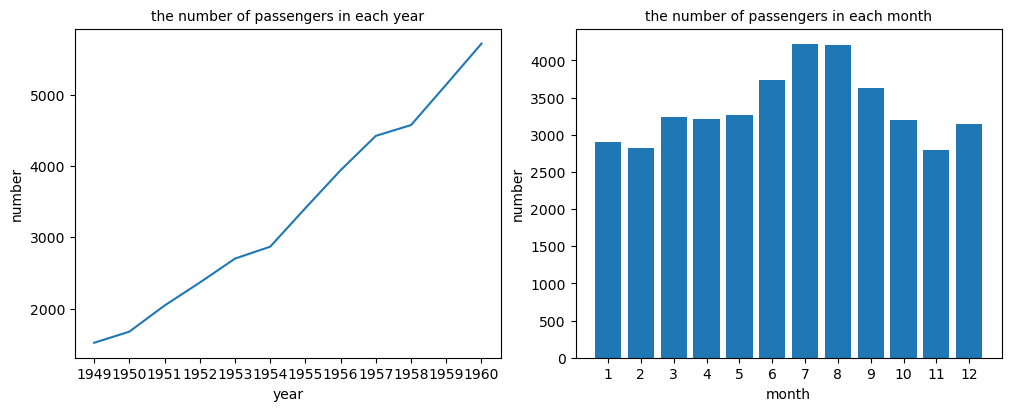

In [4]:
data1_year=data1.groupby('year')['passengers'].sum()
data1_month=data1.groupby('month')['passengers'].sum()

fig, ax = plt.subplots(1,2,figsize=(10,4),layout='constrained')
ax1=plt.subplot(1,2,1)
ax1.plot(data1_year)
ax1.set_xlabel("year")
ax1.set_ylabel("number")
ax1.xaxis.set_major_locator(MultipleLocator(1.0))
#ax2.yaxis.set_major_locator(MultipleLocator(1.0))
ax1.set_title("the number of passengers in each year",fontsize=10)

ax2=plt.subplot(1,2,2)
month=np.arange(1,13)
ax2.bar(month,data1_month)
ax2.set_xlabel("month")
ax2.set_ylabel("number")
ax2.xaxis.set_major_locator(MultipleLocator(1.0))
#ax2.yaxis.set_major_locator(MultipleLocator(1.0))
ax2.set_title("the number of passengers in each month",fontsize=10)

plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [5]:
data2 = sns.load_dataset("iris")
data2.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data2.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # # 不显示顶部和右侧的坐标线
    # ax.spines['top'].set_color('none')
    # ax.spines['right'].set_color('none')
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_ylabel(y_label)

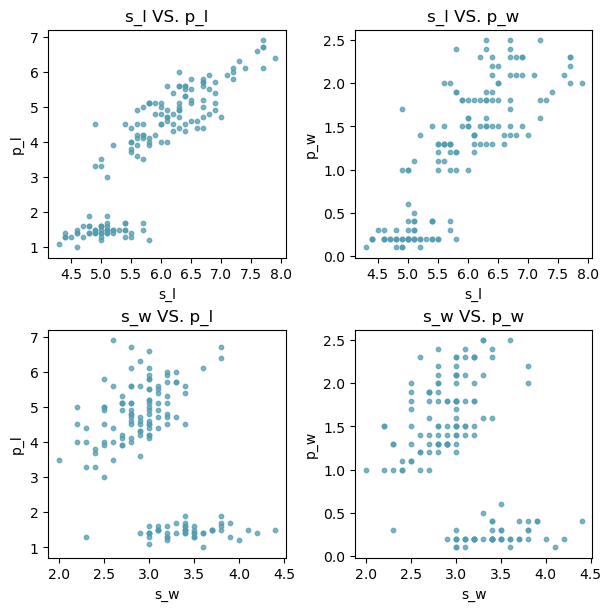

In [9]:
# 绘制散点图
fig, ax = plt.subplots(2,2,figsize=(6,6),layout='constrained')
#sepal_length	sepal_width	petal_length	petal_width	species
ax1=plt.subplot(2,2,1)
scatterplot(x_data = data2["sepal_length"]
            , y_data = data2["petal_length"]
            , x_label = 's_l'
            , y_label = 'p_l'
            , title = 's_l VS. p_l',ax=ax1)

ax2=plt.subplot(2,2,2)
scatterplot(x_data = data2["sepal_length"]
            , y_data = data2["petal_width"]
            , x_label = 's_l'
            , y_label = 'p_w'
            , title = 's_l VS. p_w',ax=ax2)

ax3=plt.subplot(2,2,3)
scatterplot(x_data = data2["sepal_width"]
            , y_data = data2["petal_length"]
            , x_label = 's_w'
            , y_label = 'p_l'
            , title = 's_w VS. p_l',ax=ax3)
ax4=plt.subplot(2,2,4)
scatterplot(x_data = data2["sepal_width"]
            , y_data = data2["petal_width"]
            , x_label = 's_w'
            , y_label = 'p_w'
            , title = 's_w VS. p_w',ax=ax4)

plt.show()

<Axes: xlabel='sepal_length', ylabel='petal_length'>

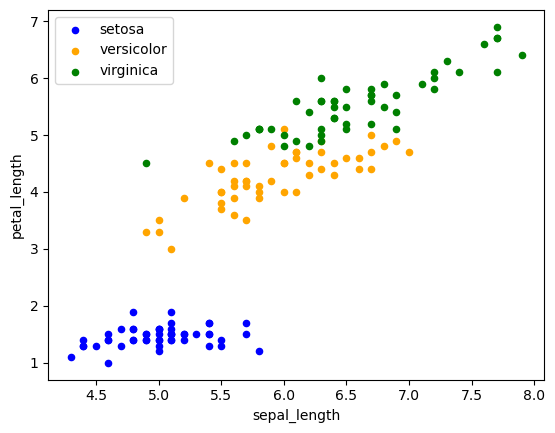

In [10]:
#setosa versicolor  virginica
#sepal_length	sepal_width	petal_length	petal_width	species
setosa=data2[data2.species=='setosa']
versicolor=data2[data2.species=='versicolor']
virginica=data2[data2.species=='virginica']

ax=setosa.plot(kind='scatter',x='sepal_length',y='petal_length',color="b",label="setosa")
versicolor.plot(kind='scatter',x='sepal_length',y='petal_length',color="orange",label="versicolor",ax=ax)
virginica.plot(kind='scatter',x='sepal_length',y='petal_length',color="g",label="virginica",ax=ax)

In [11]:
def scatterplot2(x_data, y_data, x_label, y_label, title,legend,color='#539caf',ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # # 不显示顶部和右侧的坐标线
    # ax.spines['top'].set_color('none')
    # ax.spines['right'].set_color('none')
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = color, label=legend,alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_ylabel(y_label)
    plt.legend()

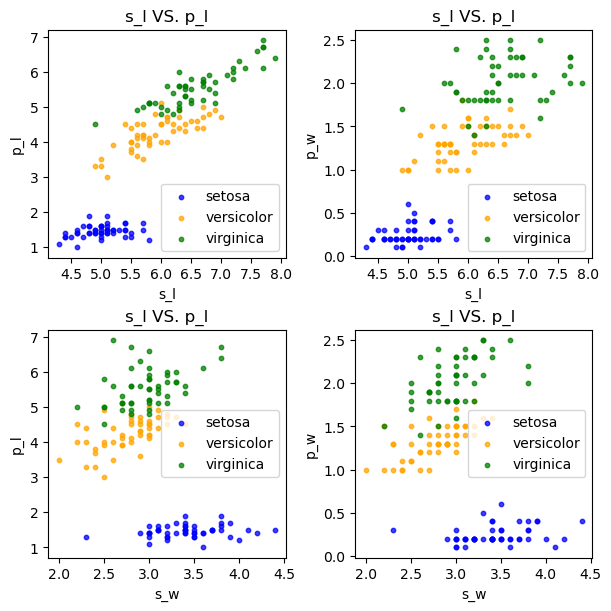

In [12]:
# 绘制散点图
#setosa versicolor  virginica
fig, ax = plt.subplots(2,2,figsize=(6,6),layout='constrained')
#sepal_length	sepal_width	petal_length	petal_width	species
ax1=plt.subplot(2,2,1)
scatterplot2(x_data = setosa["sepal_length"]
            , y_data = setosa["petal_length"]
            , x_label = 's_l'
            , y_label = 'p_l'
            , title = 's_l VS. p_l',legend='setosa',color="b",ax=ax1)
scatterplot2(x_data = versicolor["sepal_length"]
            , y_data = versicolor["petal_length"]
            , x_label = 's_l'
            , y_label = 'p_l'
            , title = 's_l VS. p_l',legend='versicolor',color="orange",ax=ax1)
scatterplot2(x_data = virginica["sepal_length"]
            , y_data = virginica["petal_length"]
            , x_label = 's_l'
            , y_label = 'p_l'
            , title = 's_l VS. p_l',legend='virginica',color="g",ax=ax1)

ax2=plt.subplot(2,2,2)
scatterplot2(x_data = setosa["sepal_length"]
            , y_data = setosa["petal_width"]
            , x_label = 's_l'
            , y_label = 'p_w'
            , title = 's_l VS. p_l',legend='setosa',color="b",ax=ax2)
scatterplot2(x_data = versicolor["sepal_length"]
            , y_data = versicolor["petal_width"]
            , x_label = 's_l'
            , y_label = 'p_w'
            , title = 's_l VS. p_l',legend='versicolor',color="orange",ax=ax2)
scatterplot2(x_data = virginica["sepal_length"]
            , y_data = virginica["petal_width"]
            , x_label = 's_l'
            , y_label = 'p_w'
            , title = 's_l VS. p_l',legend='virginica',color="g",ax=ax2)

ax3=plt.subplot(2,2,3)
scatterplot2(x_data = setosa["sepal_width"]
            , y_data = setosa["petal_length"]
            , x_label = 's_w'
            , y_label = 'p_l'
            , title = 's_l VS. p_l',legend='setosa',color="b",ax=ax3)
scatterplot2(x_data = versicolor["sepal_width"]
            , y_data = versicolor["petal_length"]
            , x_label = 's_w'
            , y_label = 'p_l'
            , title = 's_l VS. p_l',legend='versicolor',color="orange",ax=ax3)
scatterplot2(x_data = virginica["sepal_width"]
            , y_data = virginica["petal_length"]
            , x_label = 's_w'
            , y_label = 'p_l'
            , title = 's_l VS. p_l',legend='virginica',color="g",ax=ax3)

ax4=plt.subplot(2,2,4)
scatterplot2(x_data = setosa["sepal_width"]
            , y_data = setosa["petal_width"]
            , x_label = 's_w'
            , y_label = 'p_w'
            , title = 's_l VS. p_l',legend='setosa',color="b",ax=ax4)
scatterplot2(x_data = versicolor["sepal_width"]
            , y_data = versicolor["petal_width"]
            , x_label = 's_w'
            , y_label = 'p_w'
            , title = 's_l VS. p_l',legend='versicolor',color="orange",ax=ax4)
scatterplot2(x_data = virginica["sepal_width"]
            , y_data = virginica["petal_width"]
            , x_label = 's_w'
            , y_label = 'p_w'
            , title = 's_l VS. p_l',legend='virginica',color="g",ax=ax4)

plt.show()

In [13]:
data2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

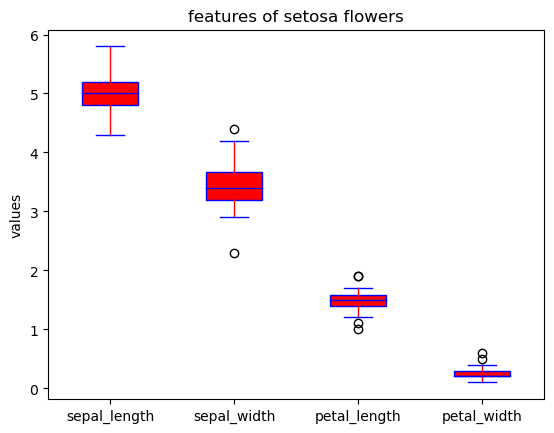

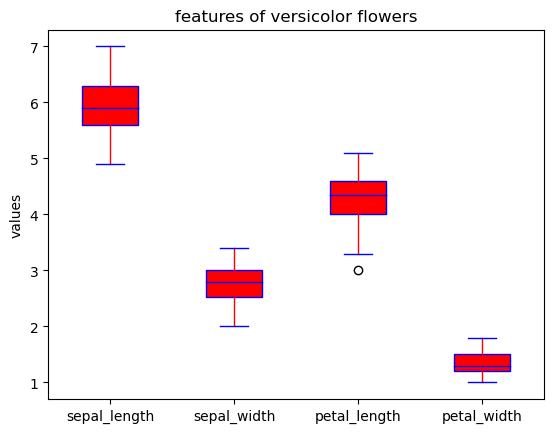

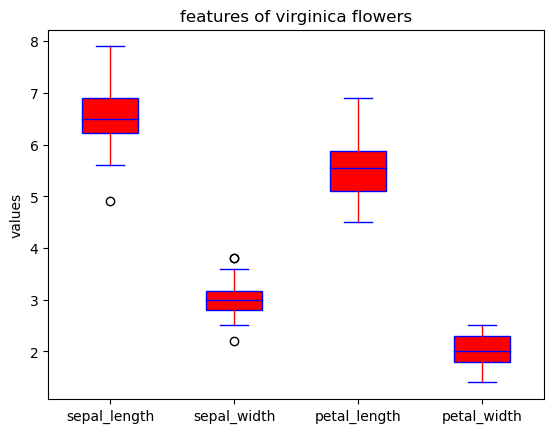

In [15]:
setosa_box=setosa[['sepal_length','sepal_width','petal_length','petal_width']]
boxplot(x_data =['sepal_length','sepal_width','petal_length','petal_width']
        , y_data = setosa_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = ''
        , y_label = 'values'
        , title = 'features of setosa flowers')

versicolor_box=versicolor[['sepal_length','sepal_width','petal_length','petal_width']]
boxplot(x_data =['sepal_length','sepal_width','petal_length','petal_width']
        , y_data = versicolor_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = ''
        , y_label = 'values'
        , title = 'features of versicolor flowers')

virginica_box=virginica[['sepal_length','sepal_width','petal_length','petal_width']]
boxplot(x_data =['sepal_length','sepal_width','petal_length','petal_width']
        , y_data = virginica_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = ''
        , y_label = 'values'
        , title = 'features of virginica flowers')

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [16]:
data3 = sns.load_dataset("tips")
data3.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # # 不显示顶部和右侧的坐标线
    # ax.spines['top'].set_color('none')
    # ax.spines['right'].set_color('none')
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_ylabel(y_label)

Text(0, 0.5, 'tip')

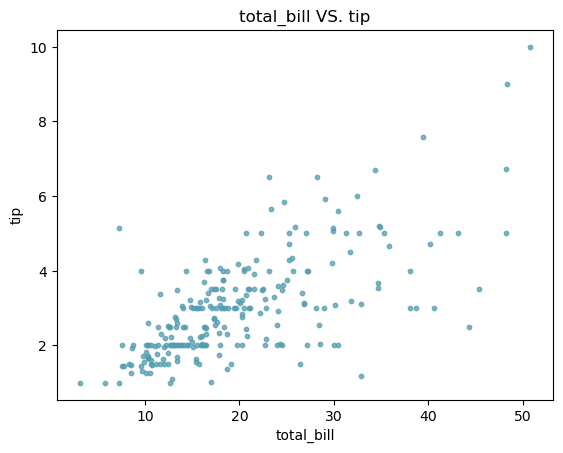

In [18]:
ax=plt.subplot()
ax.scatter(data3["total_bill"],data3["tip"], s = 10, color = '#539caf', alpha = 0.75)

# # 添加标题和坐标说明
ax.set_title('total_bill VS. tip')
ax.set_xlabel('total_bill')
#ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylabel('tip')

#scatterplot(data3["total_bill"],data3["tip"], 'total_bill','tip', 'total_bill VS. tip', ax = ax)

In [19]:
# 线性回归
#!pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
#data3["total_bill"],data3["tip"]
x = sm.add_constant(data3['total_bill']) # 线性回归增加常数项
y = data3['tip']
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, data, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = data[:,2]

In [20]:
#x.head(),type(regr)  # 普通最小二乘模型
#st # 数据汇总

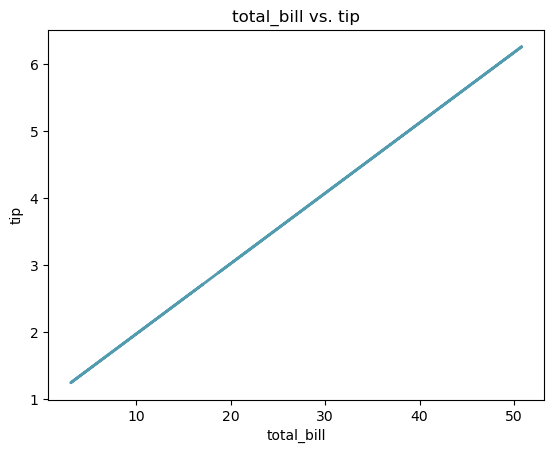

In [21]:
def lineplot(x_data, y_data, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制拟合曲线，lw=linewidth，alpha=transparancy
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
lineplot(x_data = data3['total_bill']
         , y_data = fitted_values
         , x_label = 'total_bill'
         , y_label = 'tip'
         , title = 'total_bill vs. tip')

In [22]:
# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# 创建置信区间DataFrame，上下界
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = data3['total_bill']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序

# 绘制置信区间
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制预测曲线
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # 绘制置信区间，顺序填充
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 显示图例，配合label参数，loc=“best”自适应方式
    ax.legend(loc = 'best')
    return ax




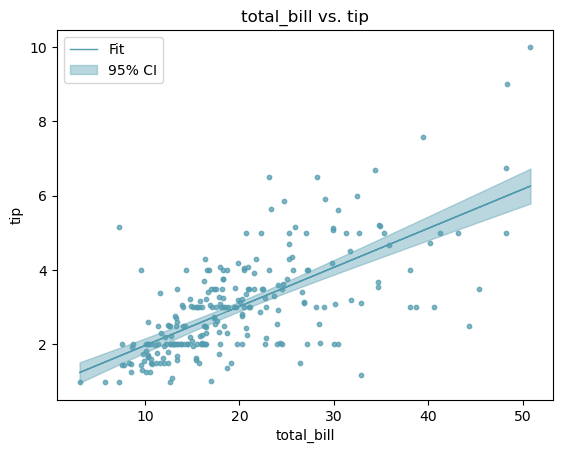

In [23]:
# Call the function to create plot
ax = lineplotCI(x_data = data3['total_bill']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'total_bill'
           , y_label = 'tip'
           , title = 'total_bill vs. tip')

#ax=plt.subplot()
ax.scatter(data3["total_bill"],data3["tip"], s = 10, color = '#539caf', alpha = 0.75)

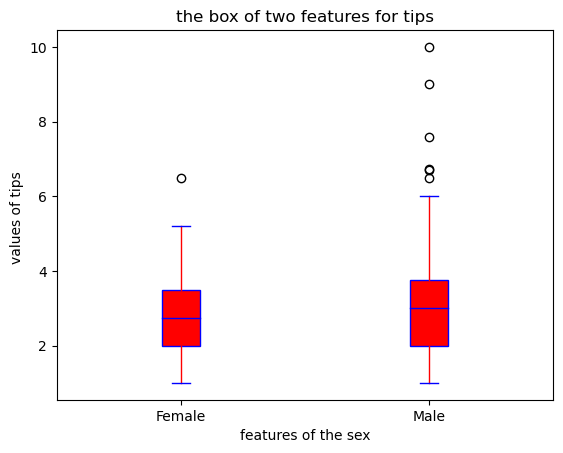

In [56]:
male=data3[data3.sex=='Female']
female=data3[data3.sex=='Male']
sex_box=[male['tip'],female['tip']]
boxplot(x_data =['Female','Male']
        , y_data = sex_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the sex'
        , y_label = 'values of tips '
        , title = 'the box of two features for tips')

In [25]:
data3.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

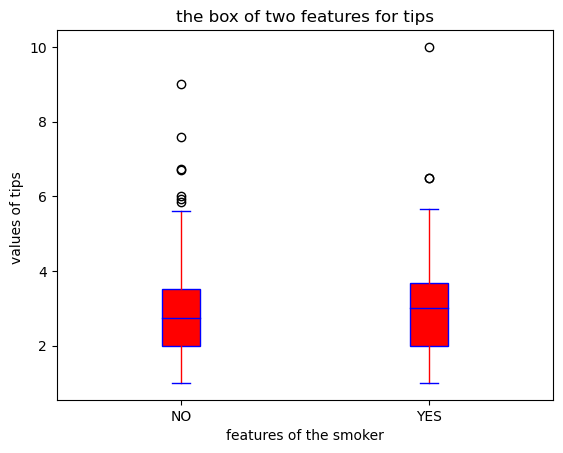

In [26]:
smoker_no=data3[data3.smoker=='No']
smoker_yes=data3[data3.smoker=='Yes']
sex_box=[smoker_no['tip'],smoker_yes['tip']]
boxplot(x_data =['NO','YES']
        , y_data = sex_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the smoker'
        , y_label = 'values of tips '
        , title = 'the box of two features for tips')

In [27]:
data3.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

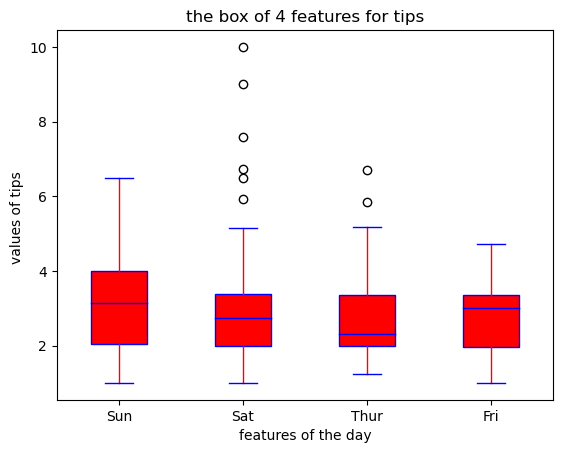

In [28]:
day_Sun=data3[data3.day=='Sun']
day_Sat=data3[data3.day=='Sat']
day_Thur=data3[data3.day=='Thur']
day_Fri=data3[data3.day=='Fri']
sex_box=[day_Sun['tip'],day_Sat['tip'],day_Thur['tip'],day_Fri['tip']]
boxplot(x_data =['Sun', 'Sat', 'Thur', 'Fri']
        , y_data = sex_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the day'
        , y_label = 'values of tips '
        , title = 'the box of 4 features for tips')

In [29]:
data3.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

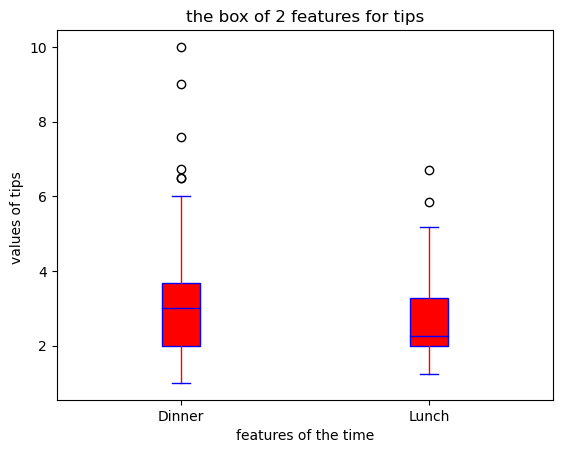

In [30]:
time_lunch=data3[data3.time=='Lunch']
time_dinner=data3[data3.time=='Dinner']

sex_box=[time_dinner['tip'],time_lunch['tip']]
boxplot(x_data =['Dinner', 'Lunch']
        , y_data = sex_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the time'
        , y_label = 'values of tips '
        , title = 'the box of 2 features for tips')

In [31]:
data3['size'].unique()

array([2, 3, 4, 1, 6, 5])

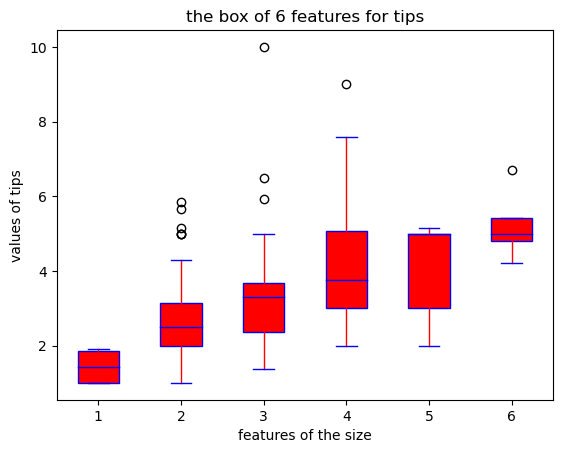

In [32]:
size_1=data3[data3['size']==1]
size_2=data3[data3['size']==2]
size_3=data3[data3['size']==3]
size_4=data3[data3['size']==4]
size_5=data3[data3['size']==5]
size_6=data3[data3['size']==6]

sex_box=[size_1['tip'],size_2['tip'],size_3['tip'],size_4['tip'],size_5['tip'],size_6['tip']]
boxplot(x_data =['1', '2','3','4', '5','6']
        , y_data = sex_box
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the size'
        , y_label = 'values of tips'
        , title = 'the box of 6 features for tips')

In [33]:
sex_smoke=data3.groupby(['sex','smoker'])['tip'].mean()
sex_smoke

/tmp/ipykernel_2615283/3077574272.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_smoke=data3.groupby(['sex','smoker'])['tip'].mean()


sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

In [34]:
sex_smoke=sex_smoke.unstack()#行转换成列
sex_smoke

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


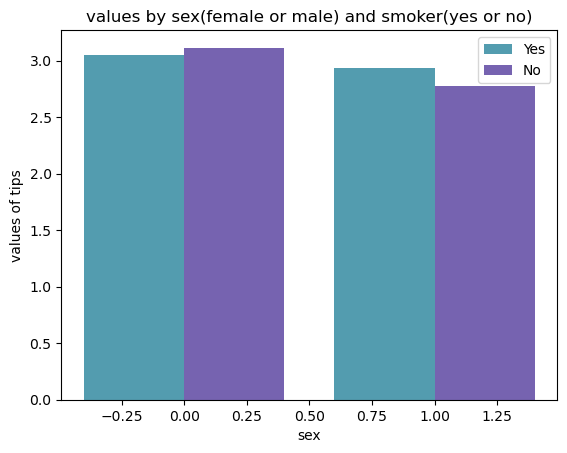

In [35]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

groupedbarplot(x_data =range(2)
               , y_data_list = [sex_smoke['Yes'], sex_smoke['No']]
               , y_data_names = ['Yes', 'No']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'values of tips'
               , title = 'values by sex(female or male) and smoker(yes or no)')

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [36]:
data4 = sns.load_dataset("titanic")
data4.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
pclass_survived=data4.groupby(['pclass','survived']).size().unstack()

pclass_survived

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [38]:
pclass_survived['total'] = pclass_survived[0] + pclass_survived[1]
pclass_survived['0_percent'] = pclass_survived[0] / pclass_survived['total'] 
pclass_survived['1_percent'] = pclass_survived[1] / pclass_survived['total'] 

In [39]:
pclass_survived

survived,0,1,total,0_percent,1_percent
pclass,,,,,
1,80,136,216,0.370370,0.629630
2,97,87,184,0.527174,0.472826
3,372,119,491,0.757637,0.242363


[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

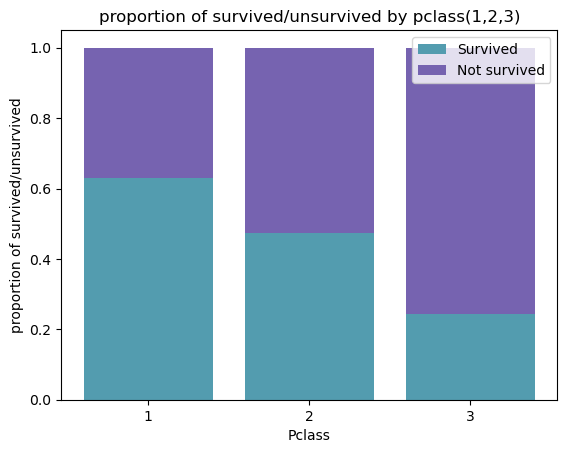

In [40]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

# 调用绘图函数
stackedbarplot(x_data = pclass_survived.index.values
               , y_data_list = [pclass_survived['1_percent'], pclass_survived['0_percent']]
               , y_data_names = ['Survived', 'Not survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Pclass'
               , y_label = 'proportion of survived/unsurvived'
               , title = 'proportion of survived/unsurvived by pclass(1,2,3)')
ax=plt.gca()
ax.set_xticks(range(1,4))
ax.set_xticklabels(pclass_survived.index.values)


In [41]:
sex_survived=data4.groupby(['sex','survived']).size().unstack()
sex_survived

survived,0,1
sex,,
female,81,233
male,468,109


In [42]:

sex_survived['total'] = sex_survived[0] + sex_survived[1]
sex_survived['0_percent'] = sex_survived[0] / sex_survived['total'] 
sex_survived['1_percent'] = sex_survived[1] / sex_survived['total'] 
sex_survived

survived,0,1,total,0_percent,1_percent
sex,,,,,
female,81,233,314,0.257962,0.742038
male,468,109,577,0.811092,0.188908


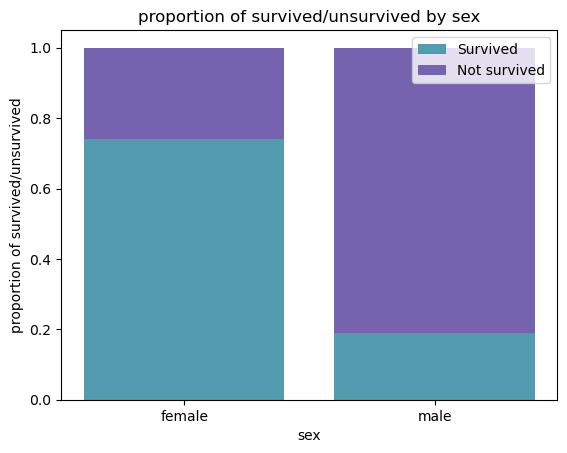

In [43]:
sex_survived['total'] = sex_survived[0] + sex_survived[1]
sex_survived['0_percent'] = sex_survived[0] / sex_survived['total'] 
sex_survived['1_percent'] = sex_survived[1] / sex_survived['total'] 
sex_survived
# 调用绘图函数
stackedbarplot(x_data = sex_survived.index.values
               , y_data_list = [sex_survived['1_percent'], sex_survived['0_percent']]
               , y_data_names = ['Survived', 'Not survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'proportion of survived/unsurvived'
               , title = 'proportion of survived/unsurvived by sex')



In [44]:
survived=data4['survived'].unique()
survived

array([0, 1])

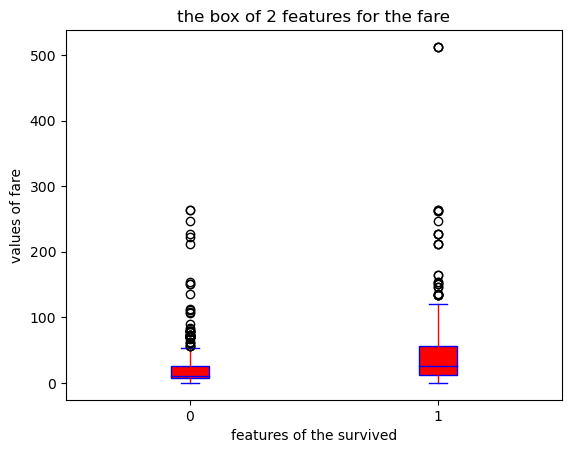

In [45]:

# bp_data=[data4[data4['survived']==survived[0]]['fare'],data4[data['survived']==survived[1]]['fare']]
# days = np.unique(data4['survived']) # [0, 1, 2, 3, 4, 5, 6]
bp_data = []
for index in survived:
    bp_data.append(data4[data4['survived']==survived[index]]['fare'].values)
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the survived'
        , y_label = 'values of fare'
        , title = 'the box of 2 features for the fare')

In [46]:

data4['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

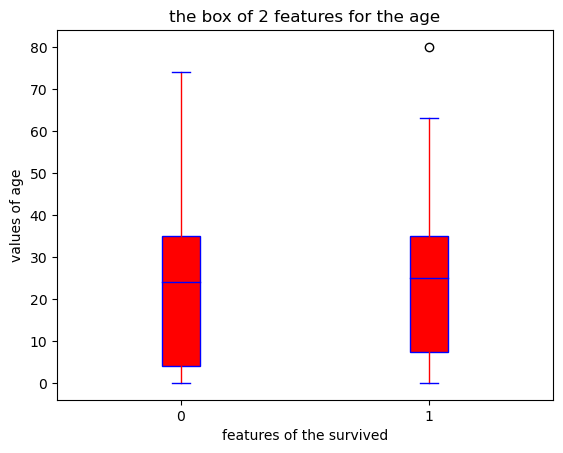

In [47]:
data4['age'].fillna(0,inplace=True)

survived=data4['survived'].unique()
bp_data = []
for index in survived:
    bp_data.append(data4[data4['survived']==survived[index]]['age'].values)
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the survived'
        , y_label = 'values of age'
        , title = 'the box of 2 features for the age')

In [48]:
embarked_pclass=data4.groupby(['embarked','pclass']).size().unstack()
#embark_pclass.fillna(0,inplace=True)
embarked_pclass

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


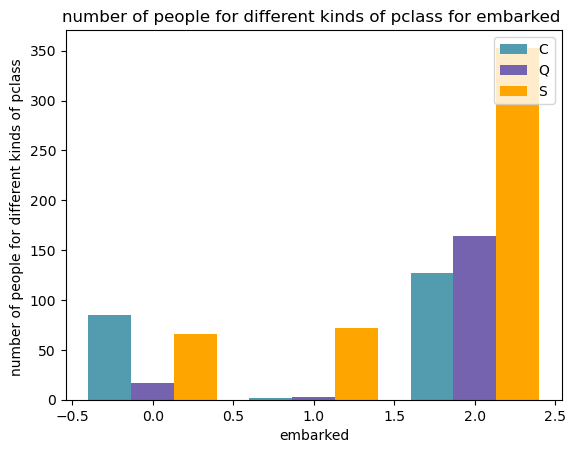

In [49]:
groupedbarplot(x_data =range(3)
               , y_data_list = [embarked_pclass[1], embarked_pclass[2],embarked_pclass[3]]
               , y_data_names = ['C', 'Q','S']
               , colors = ['#539caf', '#7663b0','orange']
               , x_label = 'embarked'
               , y_label = 'number of people for different kinds of pclass '
               , title = 'number of people for different kinds of pclass for embarked ')

In [50]:
data4['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

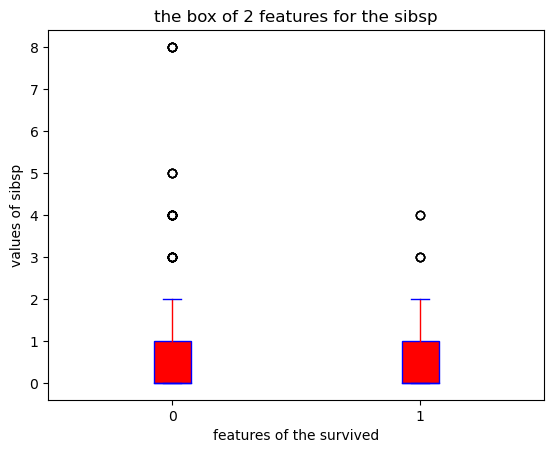

In [51]:

survived=data4['survived'].unique()
bp_data = []
for index in survived:
    bp_data.append(data4[data4['survived']==survived[index]]['sibsp'].values)
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the survived'
        , y_label = 'values of sibsp'
        , title = 'the box of 2 features for the sibsp')

In [52]:
data4['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

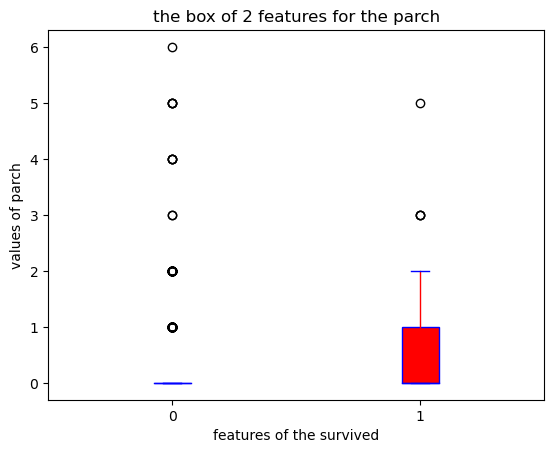

In [53]:

survived=data4['survived'].unique()
bp_data = []
for index in survived:
    bp_data.append(data4[data4['survived']==survived[index]]['parch'].values)
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'features of the survived'
        , y_label = 'values of parch'
        , title = 'the box of 2 features for the parch')

In [54]:
alone_survived=data4.groupby(['alone','survived']).size().unstack()
#embark_pclass.fillna(0,inplace=True)
alone_survived

survived,0,1
alone,,
False,175,179
True,374,163


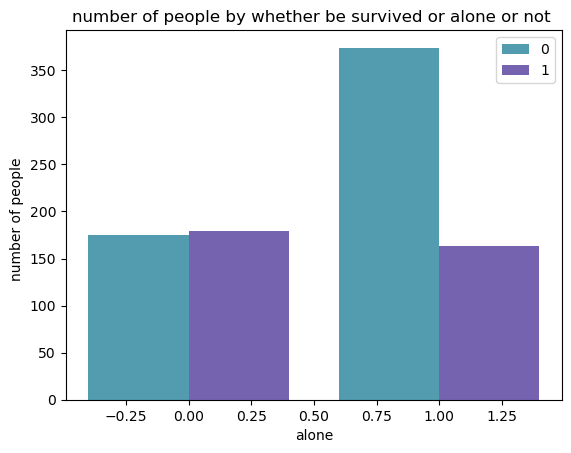

In [55]:
groupedbarplot(x_data =alone_survived.index.values
               , y_data_list = [alone_survived[0], alone_survived[1]]
               , y_data_names = ['0', '1']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'alone'
               , y_label = 'number of people  '
               , title = 'number of people by whether be survived or alone or not ')